In [1]:
import sys
sys.path.append("../")
from Data import DataLoader as dl
from Labels import PriceSeriesLabels as psl
from Labels import base 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
aapl = dl.load_data("AAPL")
tsla = dl.load_data("TSLA")

aapl_series = aapl["close"].loc['2023-01-01':]
tsla_series = tsla["close"].loc['2023-01-01':]

In [3]:
def plot_price_with_labels(price_series, label_series):
    plt.figure(figsize=(15, 4))
    
    # Tracer la série de prix
    plt.plot(price_series, label="Prix", color="blue", linewidth=1)
    
    # Afficher les labels avec des couleurs distinctes
    plt.scatter(price_series.index[label_series == 1], 
                price_series[label_series == 1], 
                color='green', label="Tendance haussière (+1)", marker="^", s=50)
    
    plt.scatter(price_series.index[label_series == -1], 
                price_series[label_series == -1], 
                color='red', label="Tendance baissière (-1)", marker="v", s=50)
    
    plt.scatter(price_series.index[label_series == 0], 
                price_series[label_series == 0], 
                color='gray', label="Neutre (0)", marker="o", s=20, alpha=0.5)

    # Ajouter un titre et une légende
    plt.title("Prix avec Labels de Tendance")
    plt.xlabel("Date")
    plt.ylabel("Prix")
    plt.legend()
    plt.grid(True)
    plt.show()

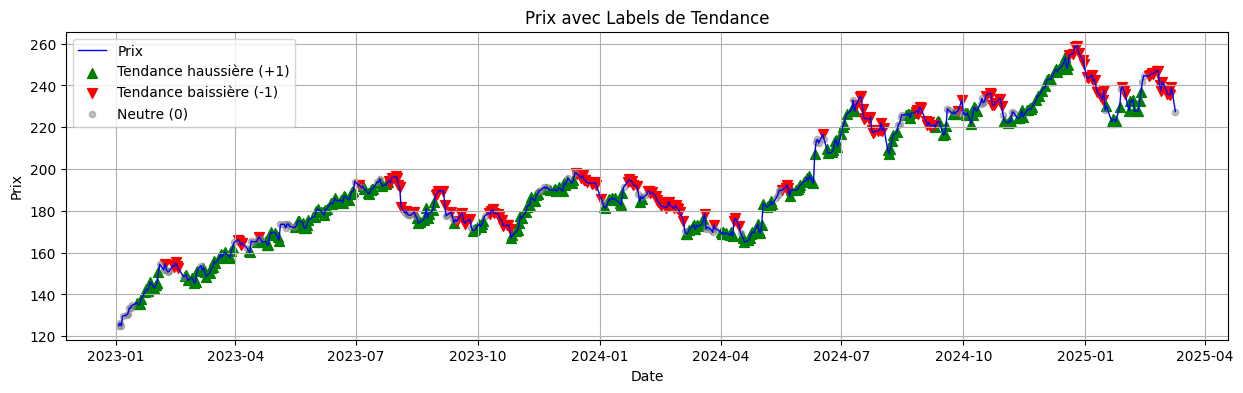

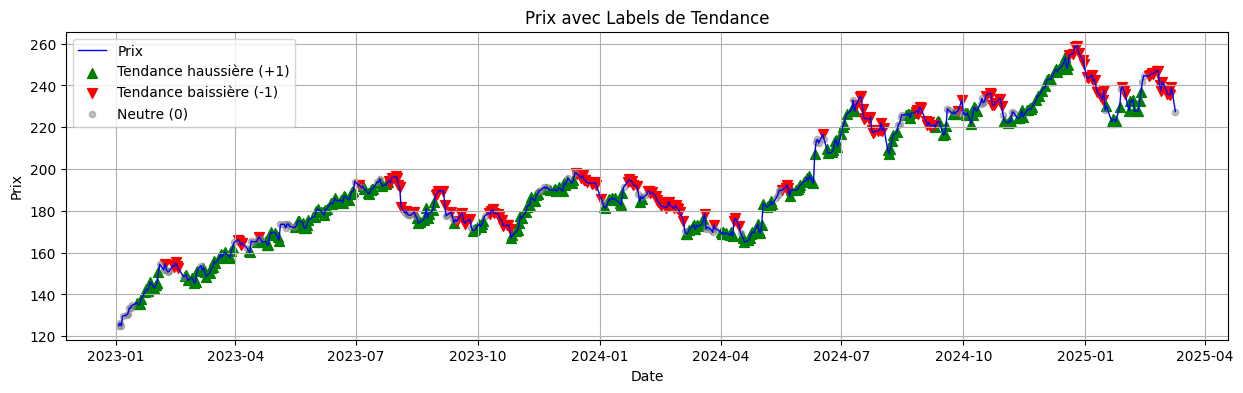

In [4]:
tripleBarrier_params = {
    "upper_barrier": 0.5,
    "lower_barrier": 1,
    "vertical_barrier": 10,
    "volatility_function": "observed",
}
tripleBarrier_labels = psl.tripleBarrier_labeller(price_series=aapl_series, params=tripleBarrier_params)
base_tr_labels = base.tripleBarrier_labeller(price_series=aapl_series, params=tripleBarrier_params)
plot_price_with_labels(aapl_series, tripleBarrier_labels)
plot_price_with_labels(aapl_series, base_tr_labels)

/home/mathis/Code/ChevalParesseux-lib/Labels/../Labels/base.py:706: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  wma[i] = np.nan
/home/mathis/Code/ChevalParesseux-lib/Labels/../Labels/base.py:704: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  wma[i] = values[i - rolling_window + 1 : i + 1].dot(weights) / np.sum(weights)


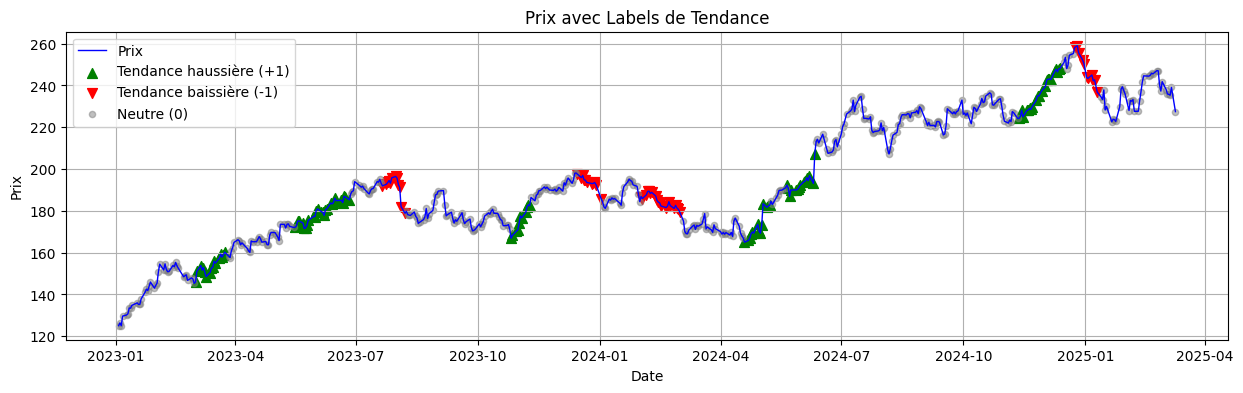

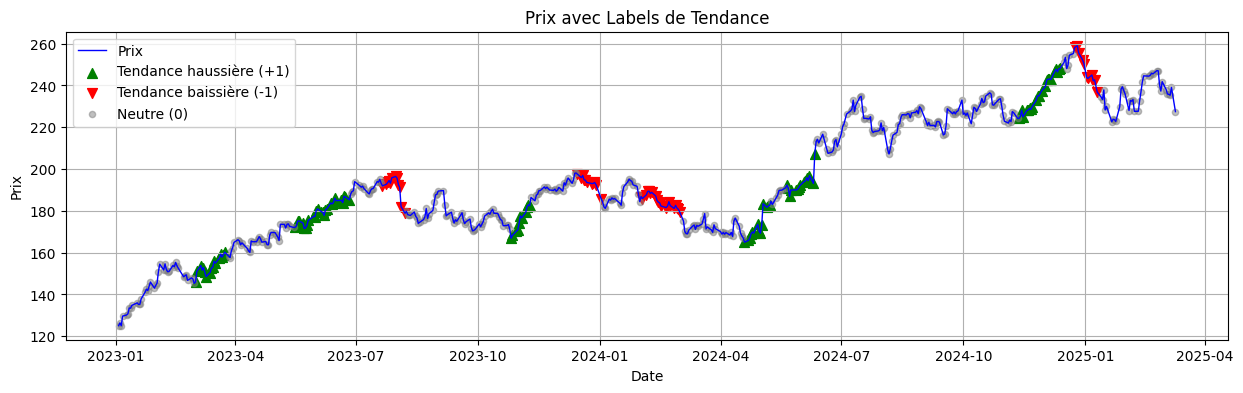

In [5]:
lookForward_params = {
    "size_window_smooth": 10,
    "lambda_smooth": 0.6,
    "trend_size": 10,
    "volatility_threshold": 1.5,
}
lookForward_labels = psl.lookForward_labeller(price_series=aapl_series, params=lookForward_params)
base_lf_labels = base.lookForward_labeller(price_series=aapl_series, params=lookForward_params)
plot_price_with_labels(aapl_series, lookForward_labels)
plot_price_with_labels(aapl_series, base_lf_labels)

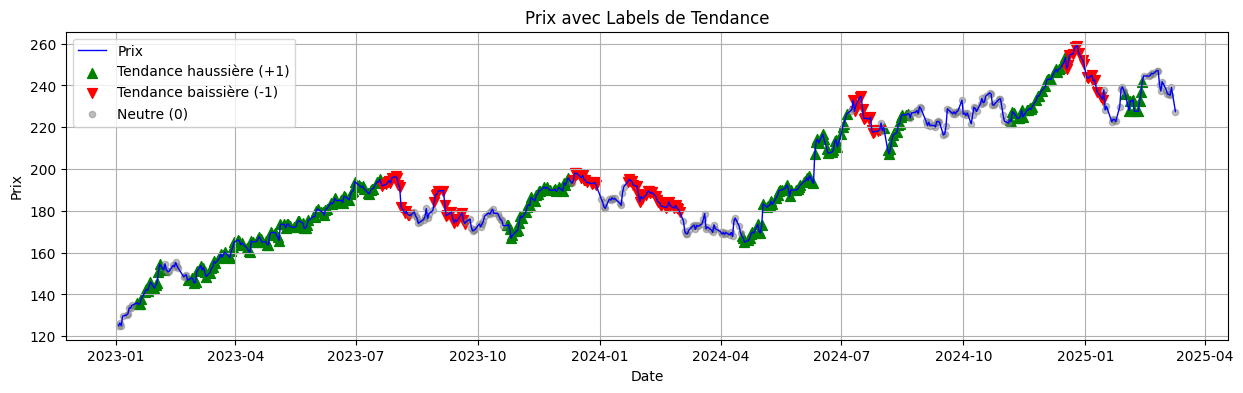

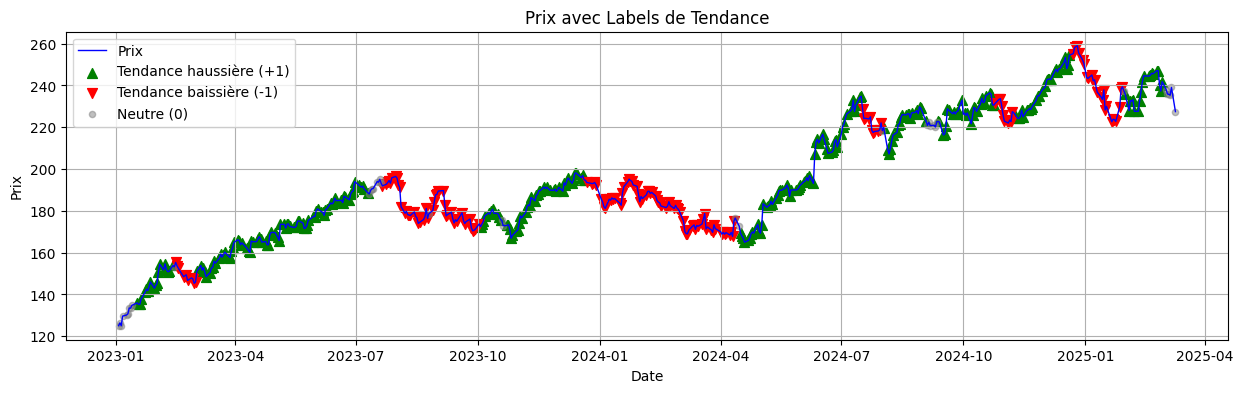

In [6]:
labelling_params = {
    "size_window_smooth": 10,
    "lambda_smooth": 0.2,
    "trend_size": 10,
    "volatility_threshold": 1.5,
    "horizon": 10,
    "horizon_extension": 1.5,
    "upper_r2_threshold": 0.8,
    "lower_r2_threshold": 0.5,
    "r": 0,
}

base_rr_labels = base.regR2rank_labeller(price_series=aapl_series, params=labelling_params)
regR2rank_labels = psl.regR2rank_labeller(price_series=aapl_series, params=labelling_params)
plot_price_with_labels(aapl_series, regR2rank_labels)
plot_price_with_labels(aapl_series, base_rr_labels)

/home/mathis/Code/ChevalParesseux-lib/Labels/../Labels/base.py:706: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  wma[i] = np.nan
/home/mathis/Code/ChevalParesseux-lib/Labels/../Labels/base.py:704: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  wma[i] = values[i - rolling_window + 1 : i + 1].dot(weights) / np.sum(weights)
/home/mathis/Code/ChevalParesseux-lib/Labels/../Labels/base.py:78: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results_df["combination_label"] = results_df["combination_label"].fillna(method="ffill")


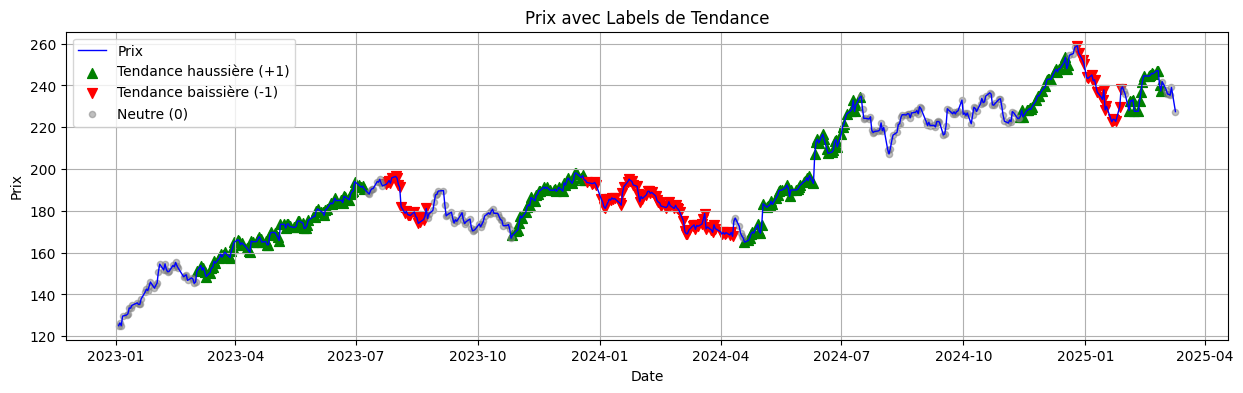

In [11]:
labelling_params = {
    "size_window_smooth": 10,
    "lambda_smooth": 0.2,
    "trend_size": 10,
    "volatility_threshold": 1.5,
    "horizon": 10,
    "horizon_extension": 1.5,
    "upper_r2_threshold": 0.8,
    "lower_r2_threshold": 0.5,
    "r": 0,
}

base_comb_labels = base.combination_labeller(price_series=aapl_series, params=labelling_params)
plot_price_with_labels(aapl_series, base_comb_labels)

/home/mathis/Code/ChevalParesseux-lib/Labels/../Labels/PriceSeriesLabels.py:216: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results_df["combination_label"] = results_df["combination_label"].fillna(method="ffill")


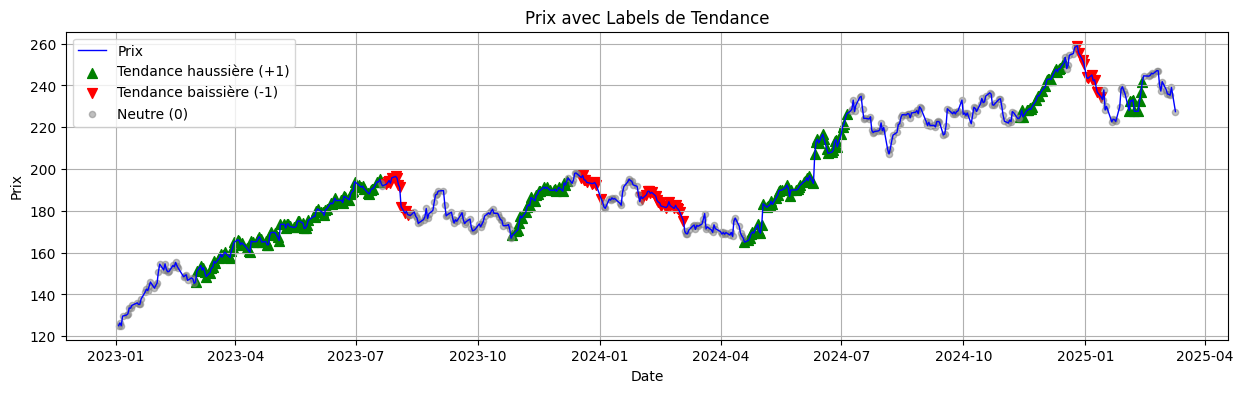

In [15]:
labelling_params = {
    "size_window_smooth": 10,
    "lambda_smooth": 0.2,
    "trend_size": 10,
    "volatility_threshold": 1.5,
    "horizon": 10,
    "horizon_extension": 2,
    "upper_r2_threshold": 0.8,
    "lower_r2_threshold": 0.5,
    "r": 0,
}
combination_labels = psl.combination_labeller(price_series=aapl_series, params=labelling_params)
plot_price_with_labels(aapl_series, combination_labels)